#### 1.1 Introduction


Starbucks coffee shop first opened its doors in Seattle, WA by three students on March 30, 1971 and it has become the biggest coffee chain in the world. Starbucks has over 31,000 stores, includig Starbucks Reserve stores and pickup-only stores. It seems like there is Starbucks on almost every corner in every town (especially in the big cities). Starbucks has variety of drinks menu including signature drinks and seasonal drinks during fall and winter season. Customers can also create customized drinks by adding more espresso shots, syrups, milks, etc. Since I really like drinking coffee, I though it would really interesting to see and anaylse nutrition facts in aech Starbucks drinks from the dataset.


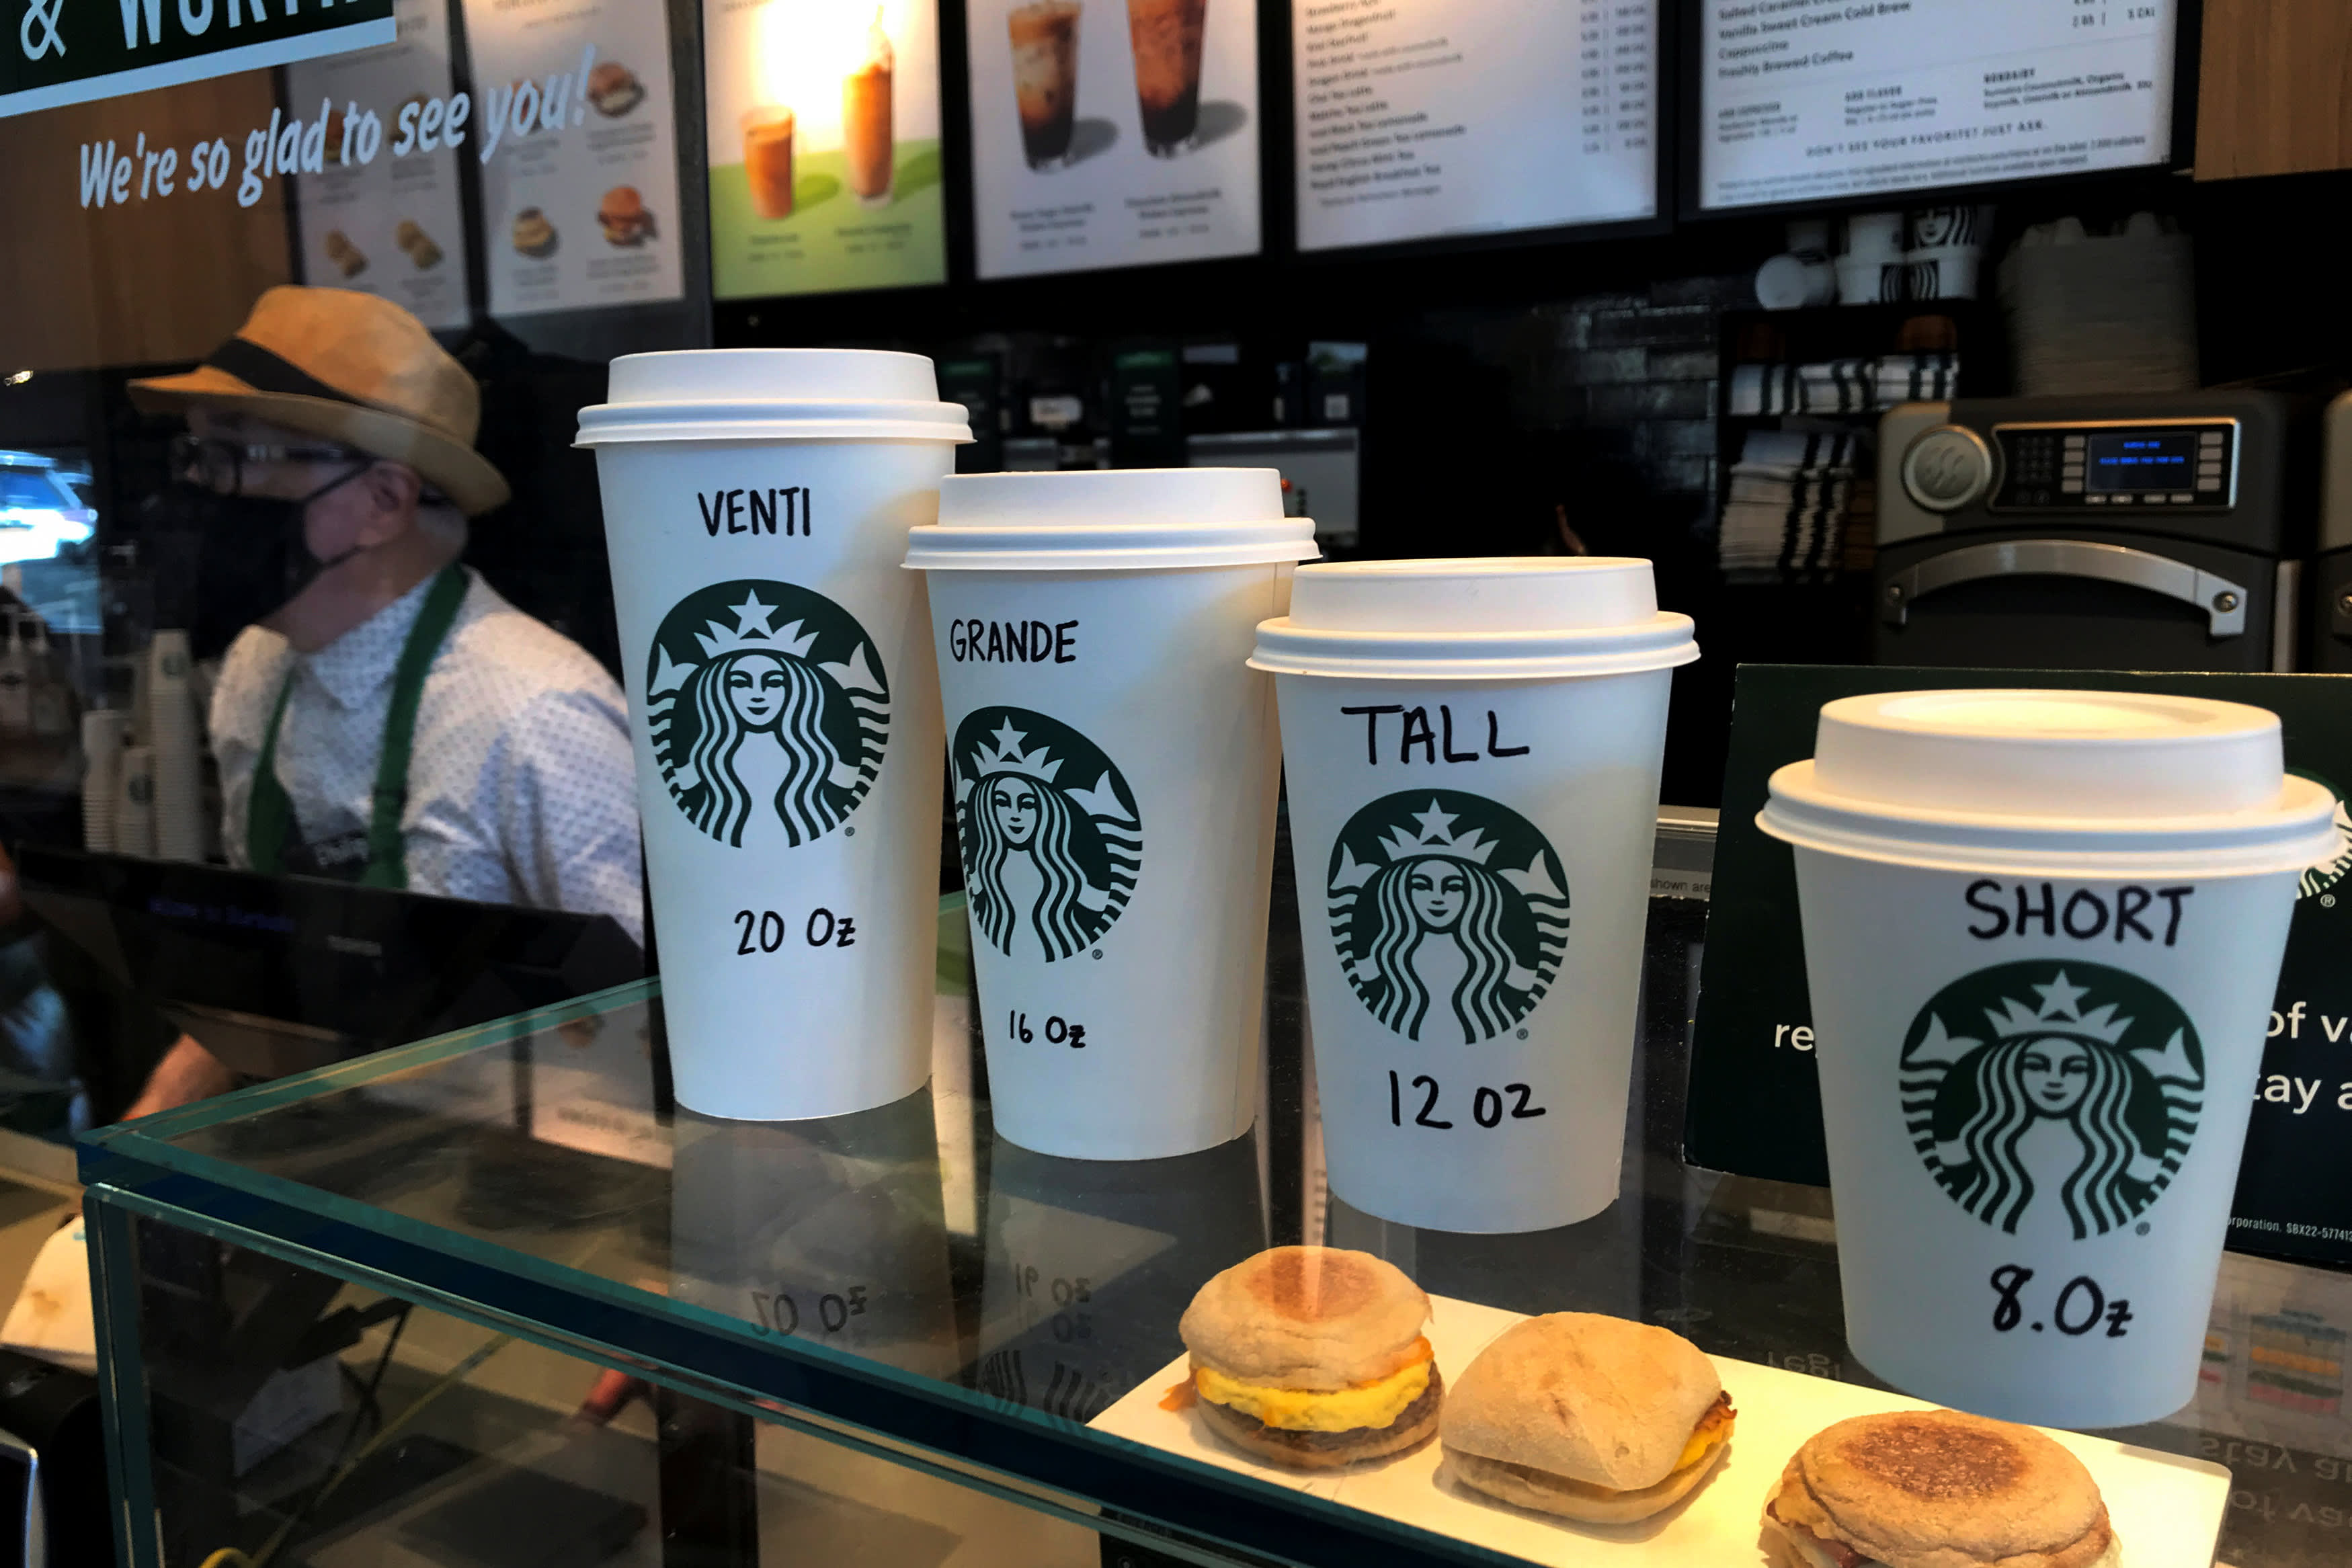

#### 1.2 Data Description

Data is taken from kaggle, link is provided below :

https://www.kaggle.com/datasets/starbucks/starbucks-menu/data?select=starbucks_drinkMenu_expanded.csv

#### 1.3 Primary Objective

This dataset includes the nutritional information for Starbucks’ food and drink menu items. All nutritional information for drinks are for a 12oz serving size.

#### 1.4 Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### 1.5 Import Data

In [2]:
starb_data = pd.read_csv('starbucks_drinkMenu_expanded.csv')
starb_data

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0


#### - Need to change the columns name

In [3]:
#Change column names for easier reference
starb_data.columns=['Bev_category', 'Beverage', 'Bev_prep', 'Calories', 'Total_Fat', 'Trans_Fat', 'Sat_Fat', 'Sodium', 'Total_carbs', 'Cholesterol', 'Dietary_Fiber', 'Sugars', 'Protein', 'Vit_A', 'Vit_C', 'Calcium', 'Iron', 'Caffeine']
starb_data.columns

Index(['Bev_category', 'Beverage', 'Bev_prep', 'Calories', 'Total_Fat',
       'Trans_Fat', 'Sat_Fat', 'Sodium', 'Total_carbs', 'Cholesterol',
       'Dietary_Fiber', 'Sugars', 'Protein', 'Vit_A', 'Vit_C', 'Calcium',
       'Iron', 'Caffeine'],
      dtype='object')

In [4]:
starb_data.dtypes

Bev_category      object
Beverage          object
Bev_prep          object
Calories           int64
Total_Fat         object
Trans_Fat        float64
Sat_Fat          float64
Sodium             int64
Total_carbs        int64
Cholesterol        int64
Dietary_Fiber      int64
Sugars             int64
Protein          float64
Vit_A             object
Vit_C             object
Calcium           object
Iron              object
Caffeine          object
dtype: object

In [5]:
starb_data.columns

Index(['Bev_category', 'Beverage', 'Bev_prep', 'Calories', 'Total_Fat',
       'Trans_Fat', 'Sat_Fat', 'Sodium', 'Total_carbs', 'Cholesterol',
       'Dietary_Fiber', 'Sugars', 'Protein', 'Vit_A', 'Vit_C', 'Calcium',
       'Iron', 'Caffeine'],
      dtype='object')

### Summary Statistics
#### - Summary Statistics for Numerical Features

In [6]:
categorical_features_starb = starb_data.select_dtypes(include=['object'])
categorical_features_starb.columns.tolist()

['Bev_category',
 'Beverage',
 'Bev_prep',
 'Total_Fat',
 'Vit_A',
 'Vit_C',
 'Calcium',
 'Iron',
 'Caffeine']

In [7]:
categorical_features_starb.describe()

,Bev_category,Beverage,Bev_prep,Total_Fat,Vit_A,Vit_C,Calcium,Iron,Caffeine
count,242,242,242,242,242,242,242,242,241
unique,9,33,13,24,11,10,14,18,36
top,Classic Espresso Drinks,Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos),Soymilk,0.1,10%,0%,10%,0%,75
freq,58,12,66,34,43,188,51,99,37


#### - Summary Statistics for Categorical Features

In [8]:
# Select numerical features
numerical_features_starb = starb_data.select_dtypes(include=['int64'])
numerical_features_starb.columns.tolist()

['Calories', 'Sodium', 'Total_carbs', 'Cholesterol', 'Dietary_Fiber', 'Sugars']

In [9]:
numerical_features_starb.describe()

,Calories,Sodium,Total_carbs,Cholesterol,Dietary_Fiber,Sugars
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,6.363636,128.884298,35.991736,0.805785,32.962810
std,102.863303,8.630257,82.303223,20.795186,1.445944,19.730199
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.000000,70.000000,21.000000,0.000000,18.000000
50%,185.000000,5.000000,125.000000,34.000000,0.000000,32.000000
75%,260.000000,10.000000,170.000000,50.750000,1.000000,43.750000
max,510.000000,40.000000,340.000000,90.000000,8.000000,84.000000


#### 1.6 Data Cleaning

####  - Removing the Duplicates if any

In [10]:
#Checke for duplicates
sum(starb_data.duplicated())

0

In [11]:
# How many NAs?
starb_data.isnull().sum()

Bev_category     0
Beverage         0
Bev_prep         0
Calories         0
Total_Fat        0
Trans_Fat        0
Sat_Fat          0
Sodium           0
Total_carbs      0
Cholesterol      0
Dietary_Fiber    0
Sugars           0
Protein          0
Vit_A            0
Vit_C            0
Calcium          0
Iron             0
Caffeine         1
dtype: int64

In [12]:
missing_vals_star = pd.concat([starb_data.isnull().sum(), 100 * starb_data.isnull().mean()], axis=1)
missing_vals_star.columns = ['count', '%']
missing_vals_star.sort_values(by = ['count', '%'])

,count,%
Bev_category,0,0.000000
Beverage,0,0.000000
Bev_prep,0,0.000000
Calories,0,0.000000
Total_Fat,0,0.000000
Trans_Fat,0,0.000000
Sat_Fat,0,0.000000
Sodium,0,0.000000
Total_carbs,0,0.000000
Cholesterol,0,0.000000


In [13]:
#Find the item with the null Caffeine value
starb_data[starb_data.isnull().any(axis=1)]

,Bev_category,Beverage,Bev_prep,Calories,Total_Fat,Trans_Fat,Sat_Fat,Sodium,Total_carbs,Cholesterol,Dietary_Fiber,Sugars,Protein,Vit_A,Vit_C,Calcium,Iron,Caffeine
158,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,90,1,0.5,0.0,5,25,18,0,18,2.0,2%,0%,6%,0.00%,NaN


In [14]:
starb_data[starb_data['Bev_category']=="Shaken Iced Beverages"].iloc[:7]

,Bev_category,Beverage,Bev_prep,Calories,Total_Fat,Trans_Fat,Sat_Fat,Sodium,Total_carbs,Cholesterol,Dietary_Fiber,Sugars,Protein,Vit_A,Vit_C,Calcium,Iron,Caffeine
154,Shaken Iced Beverages,Iced Brewed Coffee (With Classic Syrup),Tall,60,0,0.0,0.0,0,4,15,0,15,0.2,0%,0%,0%,0%,120
155,Shaken Iced Beverages,Iced Brewed Coffee (With Classic Syrup),Grande,90,0.1,0.0,0.0,0,5,21,0,21,0.3,0%,0%,0%,0%,165
156,Shaken Iced Beverages,Iced Brewed Coffee (With Classic Syrup),Venti,130,0.1,0.0,0.0,0,5,31,0,31,0.4,0%,0%,0%,0%,235
157,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Tall Nonfat Milk,80,0.1,0.0,0.0,0,25,18,0,18,2.0,2%,0%,6%,0%,90
158,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,90,1,0.5,0.0,5,25,18,0,18,2.0,2%,0%,6%,0.00%,NaN
159,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Soymilk,80,1,0.1,0.0,0,20,17,0,17,2.0,2%,0%,6%,0%,90
160,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Grande Nonfat Milk,110,0.1,0.0,0.0,0,30,24,0,24,2.0,4%,0%,8%,2%,90


In [15]:
# replace NaN value in caffiene with 90
starb_data["Caffeine"].fillna( method ='ffill', inplace = True)
starb_data.iloc[158:159]

,Bev_category,Beverage,Bev_prep,Calories,Total_Fat,Trans_Fat,Sat_Fat,Sodium,Total_carbs,Cholesterol,Dietary_Fiber,Sugars,Protein,Vit_A,Vit_C,Calcium,Iron,Caffeine
158,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,90,1,0.5,0.0,5,25,18,0,18,2.0,2%,0%,6%,0.00%,90


##### Check for Missing Values

In [16]:
starb_data.isna().sum()

Bev_category     0
Beverage         0
Bev_prep         0
Calories         0
Total_Fat        0
Trans_Fat        0
Sat_Fat          0
Sodium           0
Total_carbs      0
Cholesterol      0
Dietary_Fiber    0
Sugars           0
Protein          0
Vit_A            0
Vit_C            0
Calcium          0
Iron             0
Caffeine         0
dtype: int64

#### -  Corrections in data types

In [17]:
starb_data.head(5)

,Bev_category,Beverage,Bev_prep,Calories,Total_Fat,Trans_Fat,Sat_Fat,Sodium,Total_carbs,Cholesterol,Dietary_Fiber,Sugars,Protein,Vit_A,Vit_C,Calcium,Iron,Caffeine
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [18]:
starb_data.dtypes

Bev_category      object
Beverage          object
Bev_prep          object
Calories           int64
Total_Fat         object
Trans_Fat        float64
Sat_Fat          float64
Sodium             int64
Total_carbs        int64
Cholesterol        int64
Dietary_Fiber      int64
Sugars             int64
Protein          float64
Vit_A             object
Vit_C             object
Calcium           object
Iron              object
Caffeine          object
dtype: object

In [19]:
starb_data['Vit_A']=starb_data['Vit_A'].str[:-1]
starb_data['Vit_C']=starb_data['Vit_C'].str[:-1]
starb_data['Calcium']=starb_data['Calcium'].str[:-1]
starb_data['Iron']=starb_data['Iron'].str[:-1]

In [20]:
starb_data['Total_Fat']=pd.to_numeric(starb_data['Total_Fat'],errors='coerce')

In [21]:
starb_data['Vit_A']=starb_data['Vit_A'].astype(np.int32)

In [22]:
starb_data['Vit_C']=starb_data['Vit_C'].astype(np.int32)

In [23]:
starb_data['Calcium']=starb_data['Calcium'].astype(np.int32)


In [26]:

starb_data['Caffeine'].replace({'varies': '0', 'nan': '0'}, inplace=True)

In [27]:
starb_data['Caffeine']=starb_data['Caffeine'].astype(np.int32)

In [28]:
starb_data.dtypes

Bev_category      object
Beverage          object
Bev_prep          object
Calories           int64
Total_Fat        float64
Trans_Fat        float64
Sat_Fat          float64
Sodium             int64
Total_carbs        int64
Cholesterol        int64
Dietary_Fiber      int64
Sugars             int64
Protein          float64
Vit_A              int32
Vit_C              int32
Calcium            int32
Iron              object
Caffeine           int32
dtype: object

In [29]:
starb_data.head(5)

,Bev_category,Beverage,Bev_prep,Calories,Total_Fat,Trans_Fat,Sat_Fat,Sodium,Total_carbs,Cholesterol,Dietary_Fiber,Sugars,Protein,Vit_A,Vit_C,Calcium,Iron,Caffeine
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0,20,0,75


## Exploratory Data Analaysis

### - Analysis of nutrition drinks
#### - Which drinks have the most caffeine?

In [30]:
starb_data.nlargest(5, 'Caffeine')[['Beverage', 'Caffeine']]

,Beverage,Caffeine
3,Brewed Coffee,410
2,Brewed Coffee,330
43,Caffè Americano,300
1,Brewed Coffee,260
156,Iced Brewed Coffee (With Classic Syrup),235


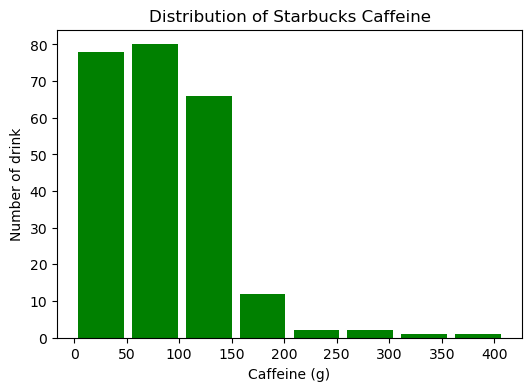

In [31]:
fig = plt.figure(figsize = (6, 4))
plt.hist(starb_data.Caffeine, bins = 8, rwidth= 0.85, color='green')
plt.title('Distribution of Starbucks Caffeine')
plt.xlabel("Caffeine (g)")
plt.ylabel("Number of drink")
plt.show()

 Brewed Coffee venti have highest amount of caffeine i.e. 410 mg in it but definatly healthy in terms of cholesterol,fat and suger. 

##### - What ratio of Starbucks drinks contain caffeine?

In [32]:
caf_perc = round(len(starb_data[starb_data.Caffeine > 0]) / len(starb_data) * 100, 2)
print('Percentage of menu drinks that contain Caffeine: ', caf_perc, '%', sep='')

Percentage of menu drinks that contain Caffeine: 76.45%


#### - How many varieties of each category does Starbucks offer?

In [33]:
starb_data.Beverage.unique()

array(['Brewed Coffee', 'Caffè Latte',
       'Caffè Mocha (Without Whipped Cream)',
       'Vanilla Latte (Or Other Flavoured Latte)', 'Caffè Americano',
       'Cappuccino', 'Espresso', 'Skinny Latte (Any Flavour)',
       'Caramel Macchiato',
       'White Chocolate Mocha (Without Whipped Cream)',
       'Hot Chocolate (Without Whipped Cream)',
       'Caramel Apple Spice (Without Whipped Cream)', 'Tazo® Tea',
       'Tazo® Chai Tea Latte', 'Tazo® Green Tea Latte',
       'Tazo® Full-Leaf Tea Latte',
       'Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)',
       'Iced Brewed Coffee (With Classic Syrup)',
       'Iced Brewed Coffee (With Milk & Classic Syrup)',
       'Shaken Iced Tazo® Tea (With Classic Syrup)',
       'Shaken Iced Tazo® Tea Lemonade (With Classic Syrup)',
       'Banana Chocolate Smoothie', 'Orange Mango Banana Smoothie',
       'Strawberry Banana Smoothie', 'Coffee',
       'Mocha (Without Whipped Cream)', 'Caramel (Without Whipped Cream)',
       'Java Chip (Wi

In [34]:
starb_data['Beverage'].shape

(242,)

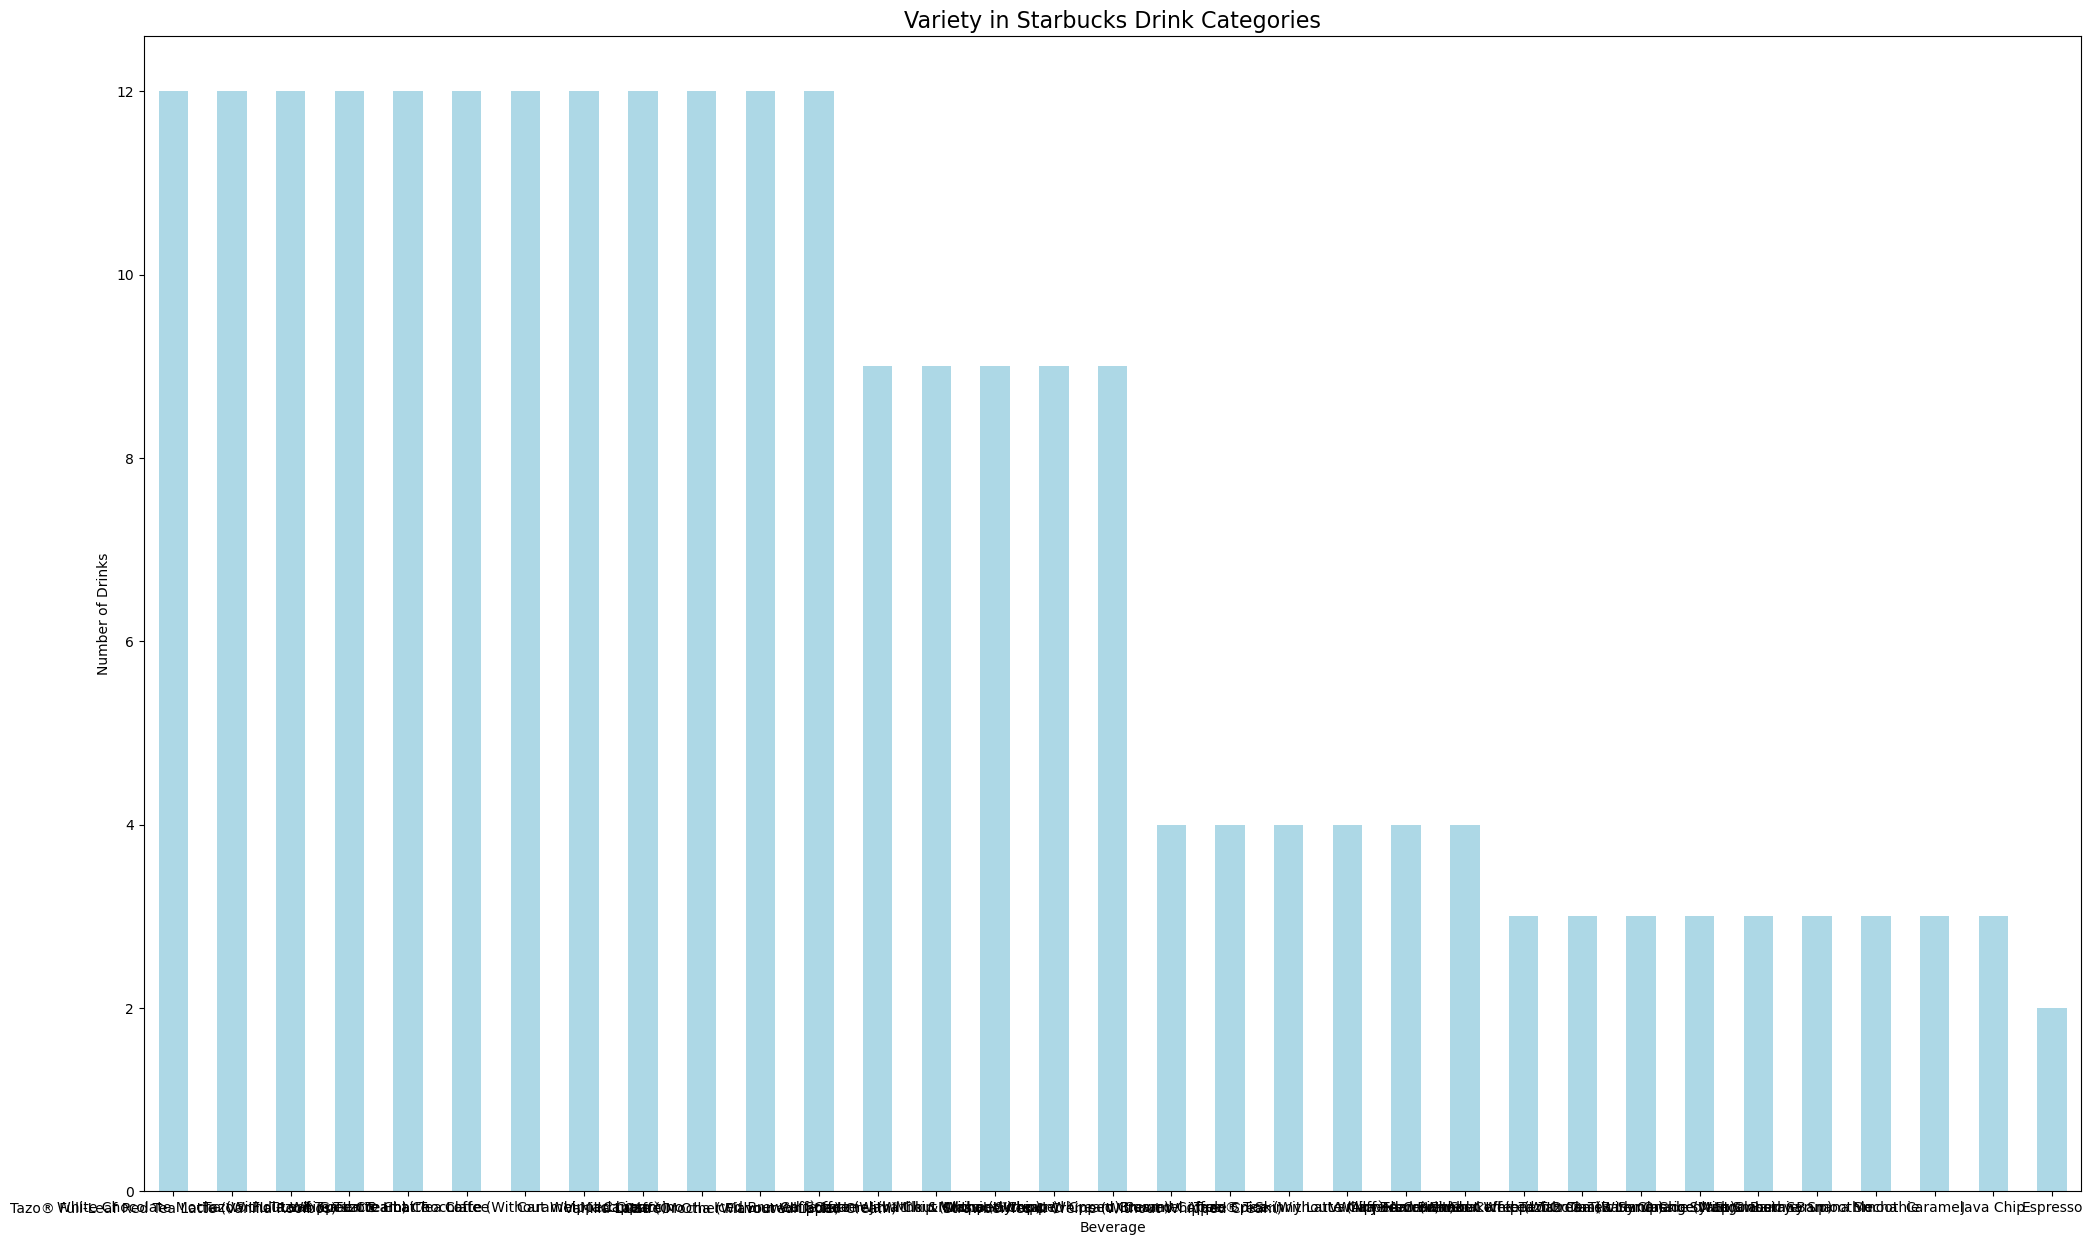

In [35]:
starb_data['Beverage'].value_counts().plot(kind='bar', figsize=(25, 15), rot=0, color='lightblue')
plt.title('Variety in Starbucks Drink Categories', fontsize=16)
plt.xlabel("Beverage")
plt.ylabel("Number of Drinks")
plt.show()


this graph shows the total numbers of varities starbucks offer i.e. 242

##### - Is there any relationship between Calories and Beverage Preparation Type?

In [36]:
starb_data.nlargest(5, 'Calories')[['Bev_prep', 'Calories']]

,Bev_prep,Calories
84,2% Milk,510
85,Soymilk,460
215,Whole Milk,460
83,Venti Nonfat Milk,450
128,2% Milk,450


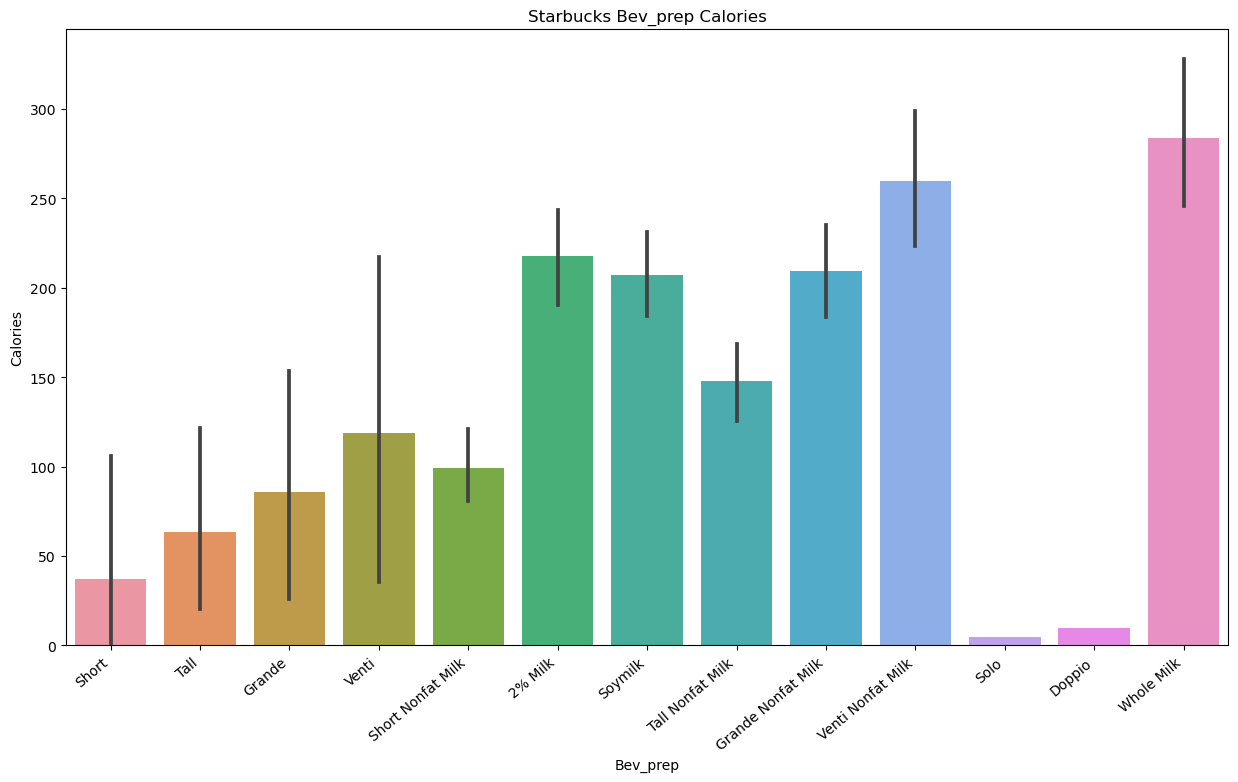

In [37]:
# data visualization to see the which Starbucks drink has the highest calories 
plt.figure(figsize=(15, 8))
sns.barplot(x="Bev_prep", y="Calories", data=starb_data)
plt.xticks(rotation=40, ha='right')
plt.title("Starbucks Bev_prep Calories")
plt.show()

To understand this, we constructed a barplot with Calories and Beverage Preparation Type. Most of the Beverages prepared with Whole Milk whereas Short beverages are the lowest. It means Whole Milk Drinks has more Calories in average.

#### - Are the average amount of Total Fat related with Starbucks Drink Category?

In [38]:
by_category = pd.DataFrame({'Beverage':starb_data['Beverage'].value_counts().index.tolist(),
                            'Count':starb_data['Beverage'].value_counts().tolist(),
                            'Total_Fat (Sum)':starb_data[['Beverage','Total_Fat']].groupby('Beverage').sum()['Total_Fat'],
                            'fTotal_Fat (Mean)':starb_data[['Beverage','Total_Fat']].groupby('Beverage').mean()['Total_Fat']})
by_category.reset_index(drop = True)

,Beverage,Count,Total_Fat (Sum),fTotal_Fat (Mean)
0,Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos),12,12.0,4.000000
1,White Chocolate Mocha (Without Whipped Cream),12,0.4,0.100000
2,Tazo® Full-Leaf Tea Latte,12,0.0,0.000000
3,Tazo® Green Tea Latte,12,45.5,3.791667
4,Tazo® Chai Tea Latte,12,62.5,5.208333
5,Coffee,12,29.6,2.466667
6,Hot Chocolate (Without Whipped Cream),12,0.3,0.100000
7,Caramel Macchiato,12,16.8,1.866667
8,Cappuccino,12,0.0,0.000000
9,Vanilla Latte (Or Other Flavoured Latte),12,47.5,3.958333


Espresso have the highest amount of total fat. Tazo® Full-Leaf Tea Latte has least amount of fat in it.

#### - Which beverages should not be drunk under specific circumstances such as high calories and total fat?

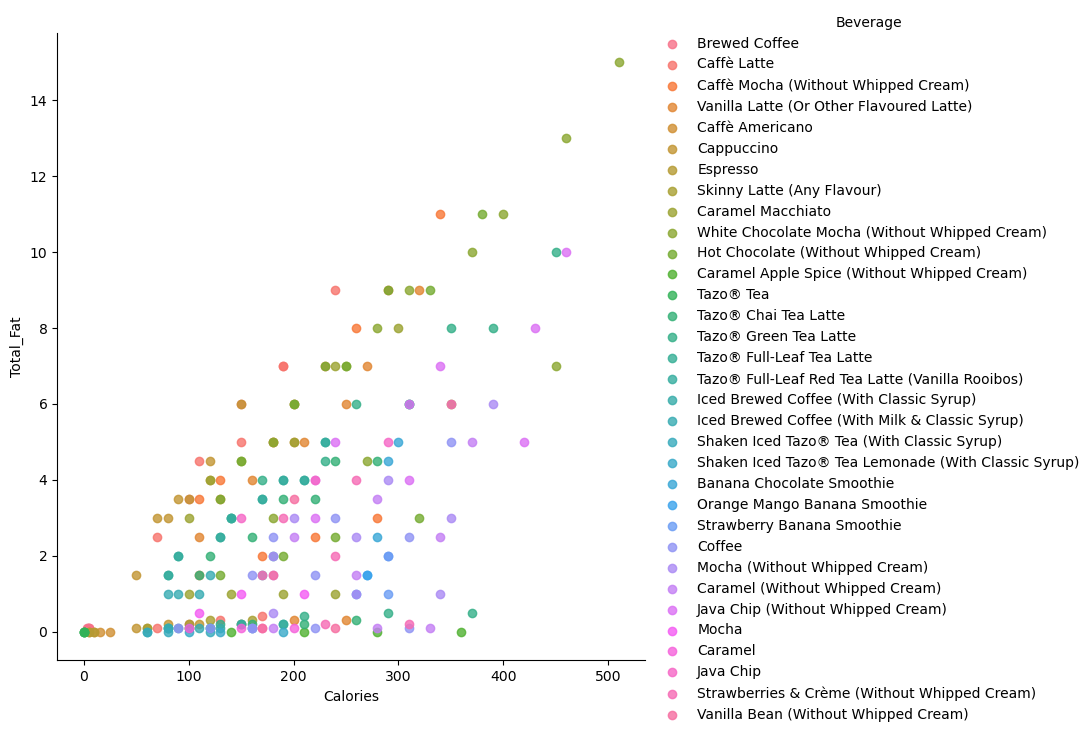

In [39]:
# Visualizing by beverage category
sns.lmplot(data = starb_data, x='Calories', y='Total_Fat', fit_reg = False, hue = 'Beverage', size = 7, aspect = 1)


Looking into the types of beverages which could be harmful for our health in terms of high fat and calories. We can simply avoid those beverages and go for those which have low fat and colories.

This graph represents the distribution of beverages with Calories and Total Fat. According to this, White Chocolate Mocha (Without Whipped Cream) and Caramel Macchiato are beverages not to be preferred. They contain a high amount of Calories and Total Fat. Especially, White Chocolate Mocha has more than 500 Calories that a quarter of the  of calories and total fat.
Caramel Apple Spice(without whipped cream, caffe`Latte has lowest amount or zero amount of calories and fat.  


In [40]:
# Highest daily intake % of Suger
high_sugar= starb_data.nlargest(5, 'Sugars')[['Beverage', 'Sugars']]
high_sugar

,Beverage,Sugars
214,Java Chip (Without Whipped Cream),84
215,Java Chip (Without Whipped Cream),84
101,Caramel Apple Spice (Without Whipped Cream),83
216,Java Chip (Without Whipped Cream),80
205,Caramel (Without Whipped Cream),77


Frappuccino® Blended Coffee beverage called Java Chip (Without Whipped Cream) made with Venti NonFat Milk or Whole Milk both tie for the most sugar at 84 grams.

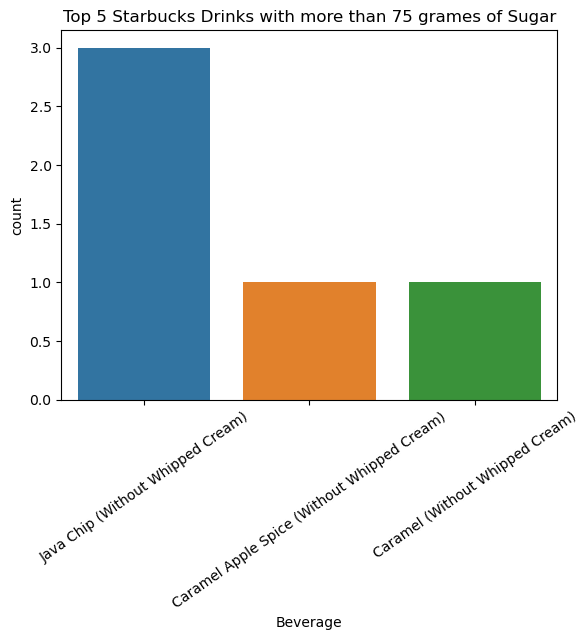

In [41]:
sns.countplot(data=high_sugar, x='Beverage')
plt.xticks(rotation=35)
plt.title('Top 5 Starbucks Drinks with more than 75 grames of Sugar');

If you want to avoid high sugar don't buy a caramel apple spice, mocha, caramel, or java chip frappuciano from Starbucks.

#### - Beverages which have low amount of suger?

In [42]:
# Lowest daily intake % of Suger
high_sugar= starb_data.nsmallest(5, 'Sugars')[['Beverage', 'Sugars']]
high_sugar

,Beverage,Sugars
0,Brewed Coffee,0
1,Brewed Coffee,0
2,Brewed Coffee,0
3,Brewed Coffee,0
40,Caffè Americano,0


Brewed Coffee and caffe` Americano has no suger which is healthy to drink if someone wants to avoid suger.

### Correlation Between  Starbucks Nutrition Drinks  

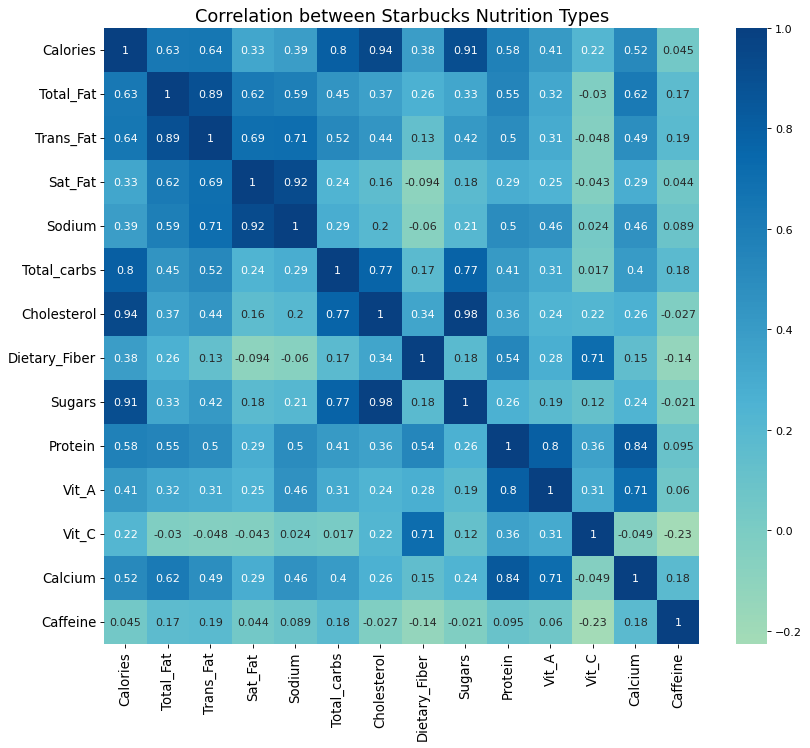

In [43]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(starb_data.corr(), xticklabels=starb_data.corr().columns, yticklabels=starb_data.corr().columns, cmap='GnBu', center=0, annot=True)

# Decorations
plt.title('Correlation between Starbucks Nutrition Types', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


This heatmap shows correlations between each nutrition type in Starbucks drinks. Darker blue colors encode a higher (more positive) nutrition type correlation. Every nutrition type shows a positive correlation with each other.

This may suggest that different levels of caffeine can be present in both sugary and non-sugary drinks. The strongest positive correlation is between Cholesterol, Sugars, and also total_carbs. which makes sense because cholesterol is one of many types of lipids. Similarly, carbohydrates and sugar have the second strongest correlation as sugar is a carbohydrate.

Other very strong positive relationships include: calories~sugar,  calories~cholesterol, and calories~carbs. it's good to verify that the correlations make sense overall.


##### - The amount of calories has a high correlation with Cholesterol, Sugars, and also total_carbs. I'll explore this further.

###### Cholesterol vs Sugars

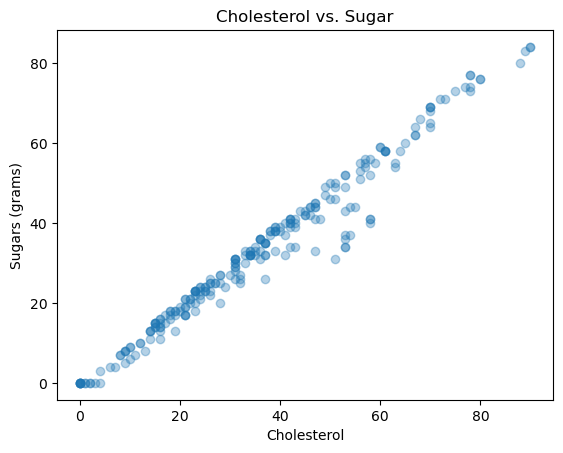

In [44]:
plt.scatter(data=starb_data, x='Cholesterol', y='Sugars', alpha=1/3)
plt.xlabel('Cholesterol')
plt.ylabel('Sugars (grams)')
plt.title('Cholesterol vs. Sugar');

Sugar and cholestrol is highly correlated to each other. More sugar more chances to have cholestrol in your drinks.

###### Calories vs Total Carbs

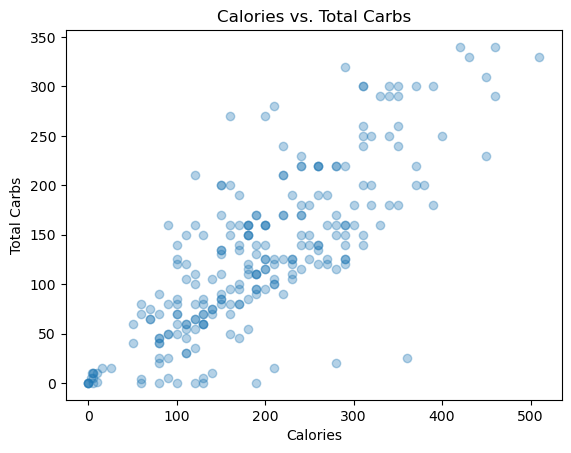

In [45]:
plt.scatter(data=starb_data, x='Calories', y='Total_carbs', alpha=1/3)
plt.xlabel('Calories')
plt.ylabel('Total Carbs')
plt.title('Calories vs. Total Carbs');

 Calories are very slightly scattered,but correlated well high the calories higher the total carbs in it.

###### Calories vs. Sugar

In [46]:
# Highest daily intake % of Suger
high_sugar= starb_data.nlargest(10, 'Sugars')[['Beverage', 'Sugars','Calories']]
high_sugar

,Beverage,Sugars,Calories
214,Java Chip (Without Whipped Cream),84,420
215,Java Chip (Without Whipped Cream),84,460
101,Caramel Apple Spice (Without Whipped Cream),83,360
216,Java Chip (Without Whipped Cream),80,430
205,Caramel (Without Whipped Cream),77,330
206,Caramel (Without Whipped Cream),77,370
196,Mocha (Without Whipped Cream),76,340
197,Mocha (Without Whipped Cream),76,390
83,White Chocolate Mocha (Without Whipped Cream),74,450
84,White Chocolate Mocha (Without Whipped Cream),74,510


In [47]:
high_sugar=high_sugar.sort_values(by='Calories', ascending=True)
high_sugar

,Beverage,Sugars,Calories
205,Caramel (Without Whipped Cream),77,330
196,Mocha (Without Whipped Cream),76,340
101,Caramel Apple Spice (Without Whipped Cream),83,360
206,Caramel (Without Whipped Cream),77,370
197,Mocha (Without Whipped Cream),76,390
214,Java Chip (Without Whipped Cream),84,420
216,Java Chip (Without Whipped Cream),80,430
83,White Chocolate Mocha (Without Whipped Cream),74,450
215,Java Chip (Without Whipped Cream),84,460
84,White Chocolate Mocha (Without Whipped Cream),74,510


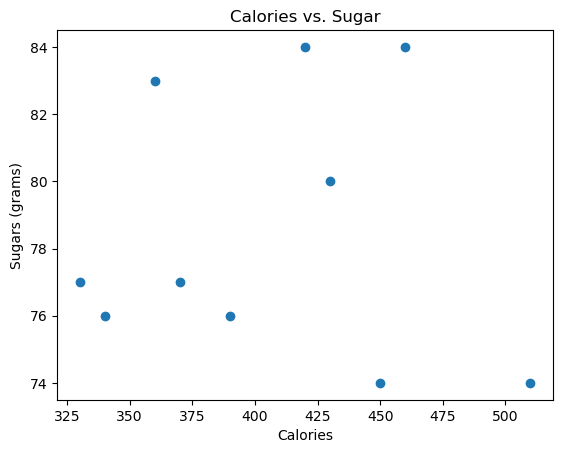

In [48]:
plt.scatter(data=high_sugar, x='Calories', y='Sugars')
plt.xlabel('Calories')
plt.ylabel('Sugars (grams)')
plt.title('Calories vs. Sugar');


Calories and sugar is distributed unevenly can't say that more Calories have more sugar beacuse looking to the graph revels  that  White Chocolate Mocha (Without Whipped Cream) has 74 grams of suger but high amount of calories i.e. 510 in whereas Java Chip (Without Whipped Cream) has 84 grams of sugar but has low in calories i.e. 430.


### Conclusion


In our dataset, there are almost 242 types of Starbucks Beverages and their 18 ingredients such as Calories, sugars, Total_Fat, Cholesterol, Beverage Preparation Type, Beverage Category and so on.
Firstly, I decided the research questions for this dataset. I investigated  beverages's relationship between Calories, sugar, total_carbs, cholestrol. Also, I looked into Caffeine level in different categories of Beverage.

The next part is the data description. In this part, we examined the distribution of these ingredients and we decided which one are quantitative or qualitative. Beverage Category, Beverages and Beverage Preparation type are qualitative whereas other ones are quantitative such as Calories, Sugars, Vitamin A, Iron and so on. After that, I looked at the distributions within these variables and drew summary statistics. Then, I checked missing values.

After I had done all the problems, I did the Exploratory Data Analysis (EDA) to test the research questions we had previously determined. As a result of these analyses, I have reached some conclusions. The most important of these are; Calories, sugar, total_carbs, cholestrol. People should avoid some Starbucks Drinks to be healthy and these are White Chocolate Mocha (Without Whipped Cream) and Caramel Macchiato. The most amount of Calories levels belongs to beverages preparation with Whole Mik.
